In [ ]:
# import requried libs and packages for data preparing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.model_selection import train_test_split

In [ ]:
# import required libs and packages for training model

from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [ ]:
# reporting
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
# saving model
import os

In [ ]:
# data augmentation
from keras.preprocessing.image import ImageDataGenerator

## Data visualization

In [ ]:
# plot a punch of pictures (10*10)
def data_visualing():
  L_matrix = 10
  W_matrix = 10
  fig, axes = plt.subplots (L_matrix,W_matrix ,figsize=(15,15))
  axes = axes.ravel()
  n_train = len(X_train)

  for i in range (0 , L_matrix*W_matrix):
    index = np.random.randint(0, n_train)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    plt.subplots_adjust(hspace=0.5)
    plt.savefig('cifar10.png')



## Data Prepration

In [ ]:
def preparing_data(train_input,train_label, test_input, test_label):
  # convert images into float types
  X_train = train_input.astype('float32')
  X_test = test_input.astype('float32')

  # convert label from decimal to binary value
  y_train = keras.utils.to_categorical(train_label,num_cat)
  y_test = keras.utils.to_categorical(test_label,num_cat)

  # data normalization
  X_train = X_train/255
  X_test = X_test/255

  # split train data into train and validation sets
  X_train, X_val,y_train, y_val = train_test_split(X_train,y_train, test_size=0.1, random_state=42)

  #  shape of each image
  Input_shape = X_train.shape[1:]

  return X_train, X_val, X_test, y_train, y_val, y_test, Input_shape



## Train the model

In [ ]:
# Build the neural network


def model_complie(num_cat):
  # model
  model= Sequential()
  model.add(Input(shape=Input_shape))                                        # Input
  model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))  # conv1
  model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))  # conv2
  model.add(MaxPooling2D(2,2))                                               # MAxPooling1
  model.add(Dropout(0.2))                                                    #Dropout1

  model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu')) # conv3
  model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu')) # conv4
  model.add(MaxPooling2D(2,2))                                               # MAxPooling2
  model.add(Dropout(0.5))                                                    # Dropout2

  model.add(Flatten())                                                       # Flattening
  model.add(Dense(units = 512, activation = 'relu'))                         # Dense1
  model.add(Dense(units = 512, activation = 'relu'))                         # Dense2

  model.add(Dense(units = num_cat, activation = 'softmax'))                  # Output

  #compile
  model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(learning_rate=0.001) , metrics=['accuracy'])

  return model


## Evaluate the model

In [ ]:
def evaluate_model(history):
    # Check how accracy and loss changes over the training epochs

    epoch_accuracy = history.history['accuracy']
    epoch_val_accuracy = history.history['val_accuracy']
    epoch_loss = history.history['loss']
    epoch_val_loss = history.history['val_loss']

    plt.figure(figsize=(20, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, 'b-', linewidth=2, label='Training Accuracy')
    plt.plot(range(0, len(epoch_val_accuracy)), epoch_val_accuracy, 'r-', linewidth=2, label='Validation Accuracy')
    plt.ylim(0,1)
    plt.title('Training & validation accuracy over epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')

    plt.subplot(1, 2, 2)
    plt.plot(range(0, len(epoch_loss)), epoch_loss, 'b-', linewidth=2, label='Training Loss')
    plt.plot(range(0, len(epoch_val_loss)), epoch_val_loss, 'r-', linewidth=2, label='Validation Loss')
    plt.ylim(0,2)
    plt.title('Training & validation loss over epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='best')

    plt.show()

In [ ]:

# visualizing predicted classes
def predicted_visualing_reporting(predicted_classes):
  L = 7
  W = 7
  fig , axes = plt.subplots(L,W, figsize = (12 , 12))
  axes =  axes.ravel()

  for i in range (L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title(f'Prediction = {predicted_classes[i]}\n True = {y_test_true[i]}')
    axes[i].axis('off')
  plt.subplots_adjust(wspace=1 , hspace =0.4)
  plt.savefig('predicted.png')

  # confusion matrix
  cm = confusion_matrix (y_true = y_test_true ,y_pred = predicted_classes)
  plt.figure(figsize = (10,6))
  sns.heatmap(cm, annot=True)
  plt.savefig('confusion.png')



## Saving the model

In [ ]:
def saving_model(name, model):

  directory = os.path.join(os.getcwd(), 'saved_models')

  if not os.path.isdir(directory):
    os.makedirs(directory)

  model_path = os.path.join(directory ,name )

  model.save(model_path)

# Main

## import data

In [ ]:
from keras.datasets import cifar10

(X_train,y_train),(X_test,y_test) = cifar10.load_data()
num_cat =10

print( 'X_train shape:',X_train.shape)
print( 'y_train shape:',y_train.shape)
print( 'X_test shape:',X_test.shape)
print( 'y_test shape:',y_test.shape)
print('-'*20)

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
--------------------


--------------------


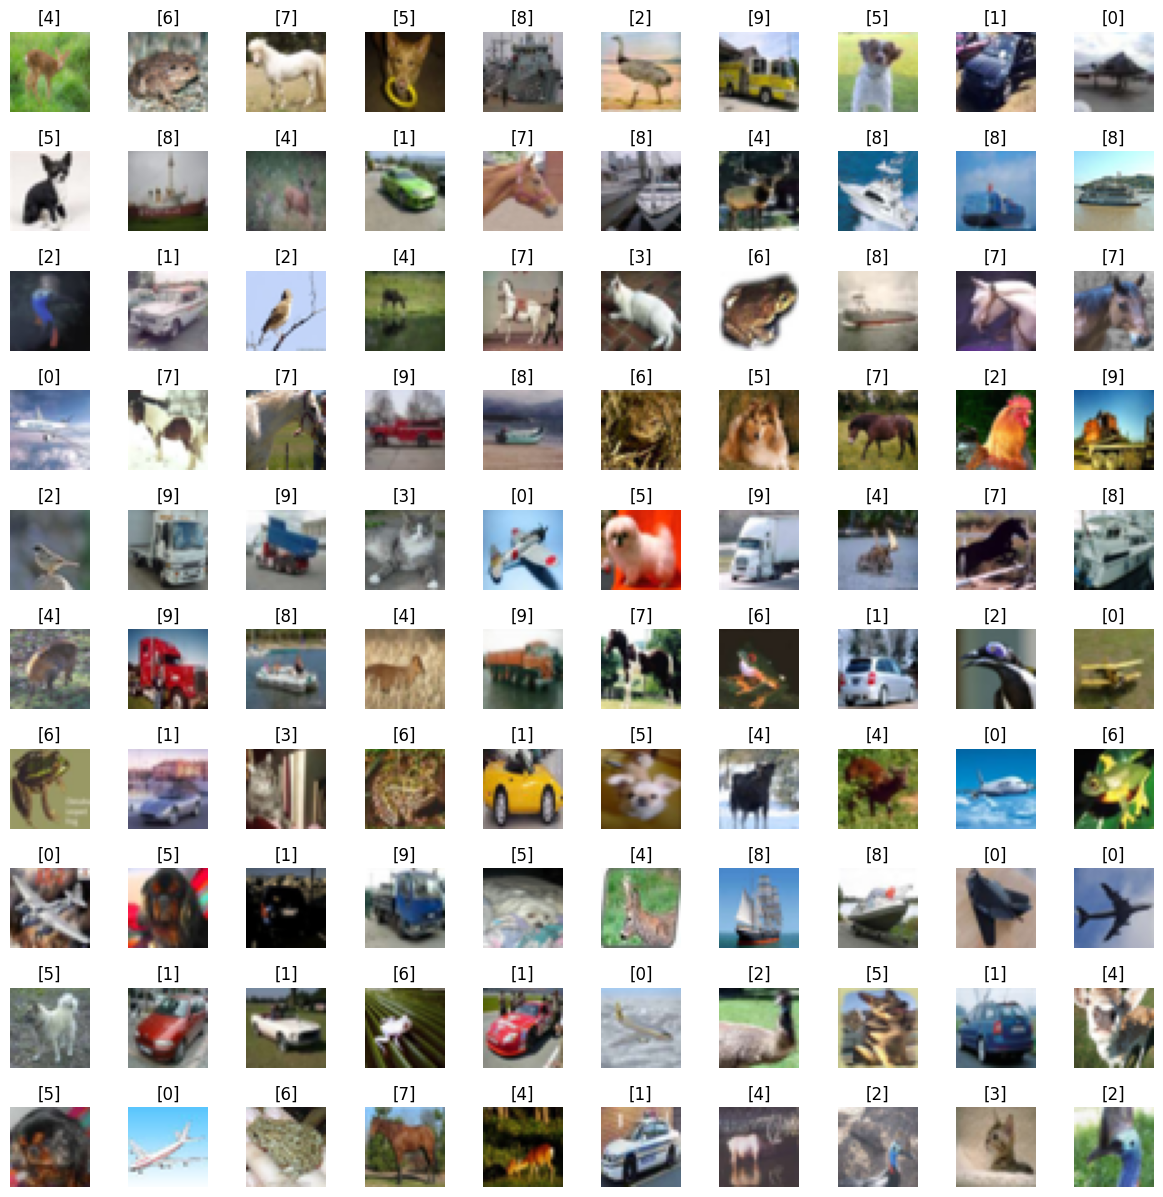

In [ ]:
data_visualing()
print('-'*20)

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test, Input_shape = preparing_data(X_train,y_train, X_test, y_test)


cnn_model = model_complie(num_cat)
cnn_model.summary()
keras.utils.plot_model(cnn_model, show_shapes=True, show_layer_activations=True, to_file='CiFAR-10 CNN_sequential_model.png')
print('-'*20)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 128)       147584    
                                                      

Epoch 1/20
704/704 [==============================] - 14s 12ms/step - loss: 1.7810 - accuracy: 0.3484 - val_loss: 1.5832 - val_accuracy: 0.4080
Epoch 2/20
704/704 [==============================] - 8s 11ms/step - loss: 1.2881 - accuracy: 0.5412 - val_loss: 1.6134 - val_accuracy: 0.4860
Epoch 3/20
704/704 [==============================] - 8s 11ms/step - loss: 1.0418 - accuracy: 0.6336 - val_loss: 1.0523 - val_accuracy: 0.6294
Epoch 4/20
704/704 [==============================] - 8s 11ms/step - loss: 0.8948 - accuracy: 0.6898 - val_loss: 0.9946 - val_accuracy: 0.6590
Epoch 5/20
704/704 [==============================] - 8s 11ms/step - loss: 0.7925 - accuracy: 0.7261 - val_loss: 0.8336 - val_accuracy: 0.7188
Epoch 6/20
704/704 [==============================] - 8s 11ms/step - loss: 0.7177 - accuracy: 0.7523 - val_loss: 0.8441 - val_accuracy: 0.7180
Epoch 7/20
704/704 [==============================] - 9s 13ms/step - loss: 0.6699 - accuracy: 0.7702 - val_loss: 0.7248 - val_accuracy: 0.758

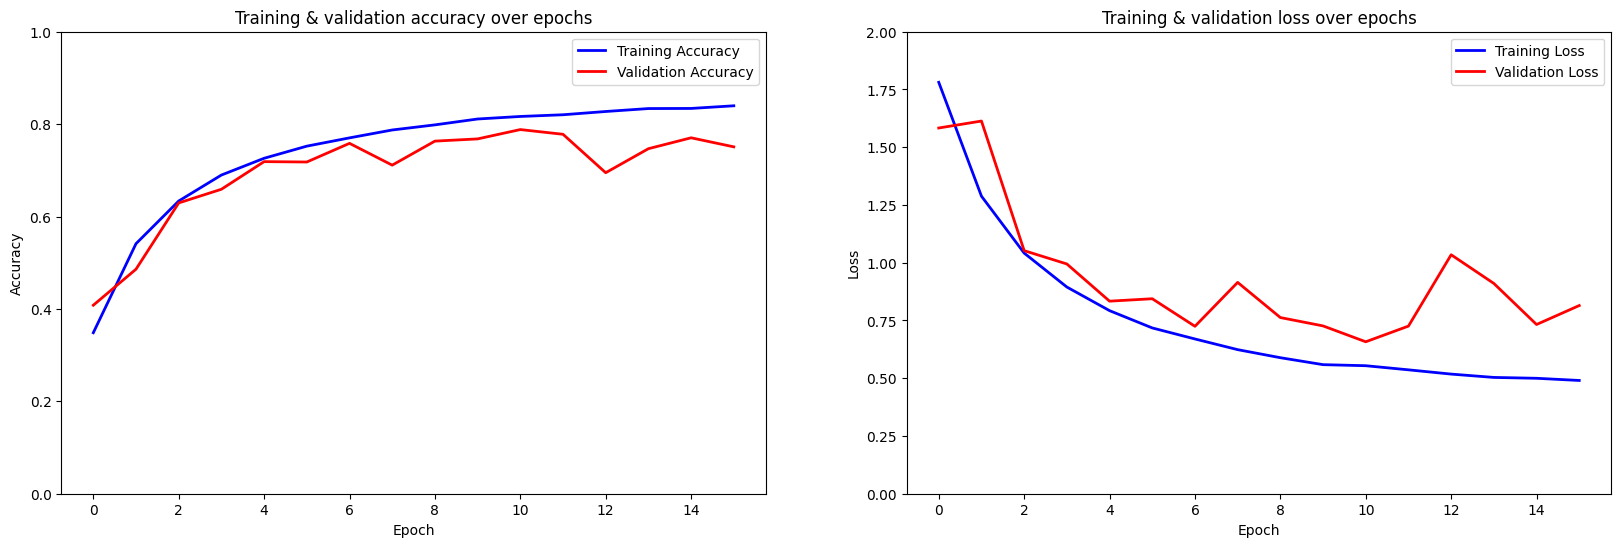

--------------------

313/313 [==============================] - 2s 5ms/step - loss: 0.6726 - accuracy: 0.7811
Test Loss: 0.6726, Test Accuracy: 0.7811

313/313 [==============================] - 1s 2ms/step
Predicted classes:

 [8 8 8 ... 5 1 7]
--------------------



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


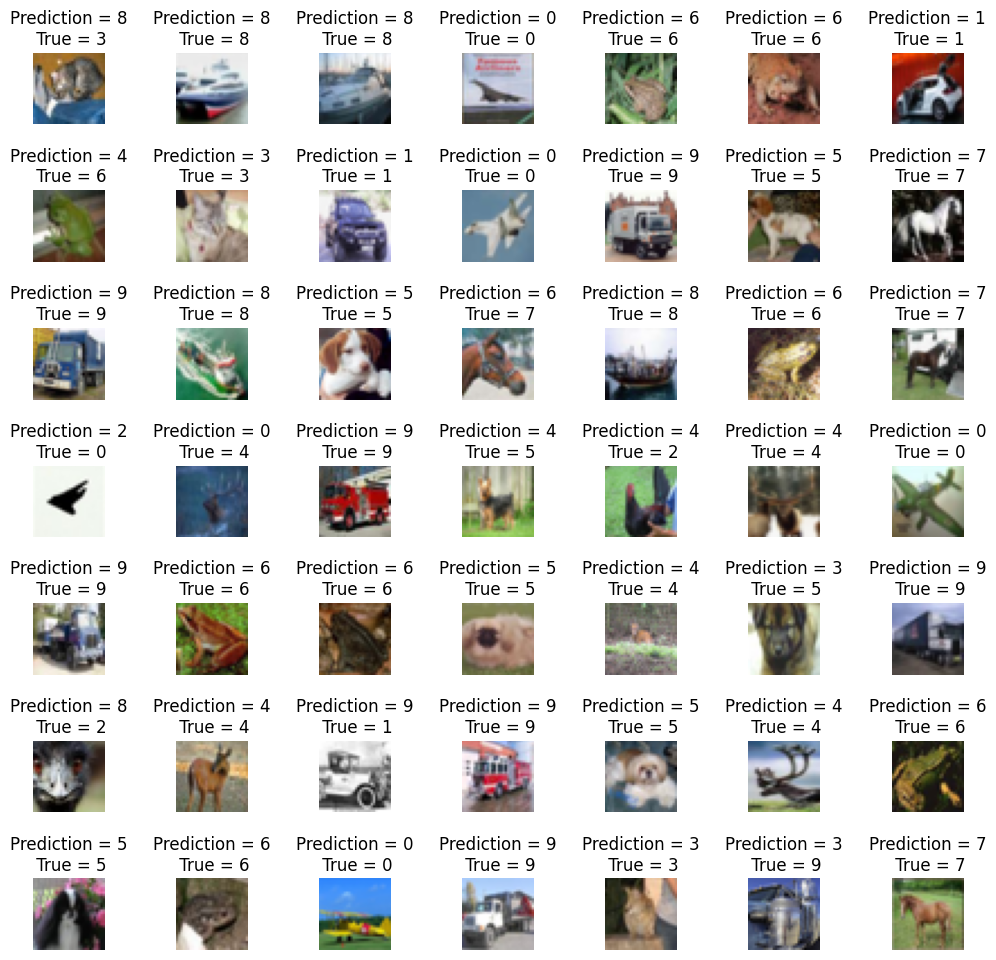

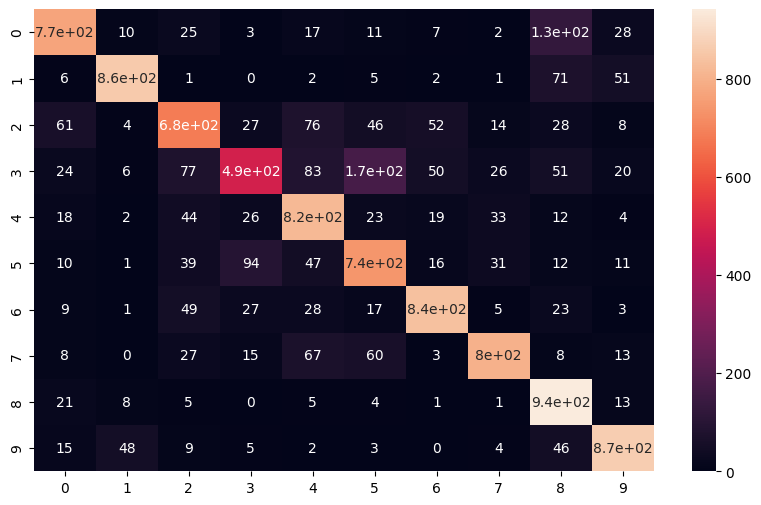

In [ ]:
# Train the model

callback = keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 5 ,restore_best_weights = True)
cnn_model_history = cnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size = 64, epochs = 20, shuffle = True, callbacks=[callback])
evaluate_model(cnn_model_history)
print('-'*20)
print()

loss, accuracy = cnn_model.evaluate(X_test,y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")
print()

# make predictions (categories) on the test data
y_pred = cnn_model.predict(X_test)

# Get the class with the highest probability for each input sentence
predicted_classes = y_pred.argmax(axis=1)

print(f'Predicted classes:\n\n {predicted_classes}')
y_test_true = y_test.argmax(1)

predicted_visualing_reporting(predicted_classes)
print('-'*20)
print()


saving_model('keras_cifar10_trained_model.h5', cnn_model)


## Image Augmentation
#### Retrain the Model with Augmented Dataset

Epoch 1/30
704/704 [==============================] - 30s 42ms/step - loss: 0.9024 - accuracy: 0.6956 - val_loss: 0.8037 - val_accuracy: 0.7252
Epoch 2/30
704/704 [==============================] - 29s 41ms/step - loss: 0.8629 - accuracy: 0.7093 - val_loss: 0.7554 - val_accuracy: 0.7586
Epoch 3/30
704/704 [==============================] - 30s 43ms/step - loss: 0.8496 - accuracy: 0.7152 - val_loss: 0.7688 - val_accuracy: 0.7456
Epoch 4/30
704/704 [==============================] - 29s 42ms/step - loss: 0.8309 - accuracy: 0.7202 - val_loss: 0.7436 - val_accuracy: 0.7500
Epoch 5/30
704/704 [==============================] - 30s 43ms/step - loss: 0.8275 - accuracy: 0.7254 - val_loss: 0.6366 - val_accuracy: 0.7880
Epoch 6/30
704/704 [==============================] - 29s 42ms/step - loss: 0.8243 - accuracy: 0.7261 - val_loss: 0.6266 - val_accuracy: 0.7934
Epoch 7/30
704/704 [==============================] - 29s 41ms/step - loss: 0.8164 - accuracy: 0.7239 - val_loss: 0.6046 - val_accuracy:

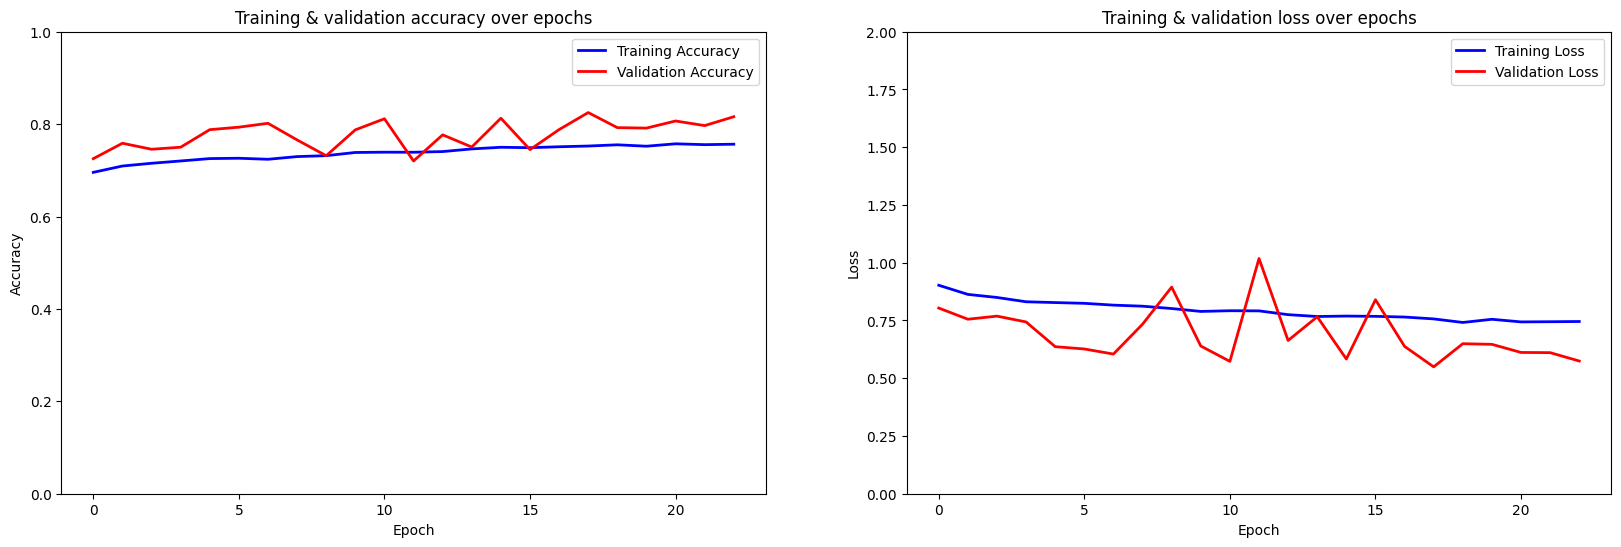

--------------------
313/313 [==============================] - 1s 3ms/step - loss: 0.5681 - accuracy: 0.8167
Test Loss: 0.5681, Test Accuracy: 0.8167
--------------------
313/313 [==============================] - 1s 2ms/step
Predicted classes:

 [8 8 8 ... 5 1 7]


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


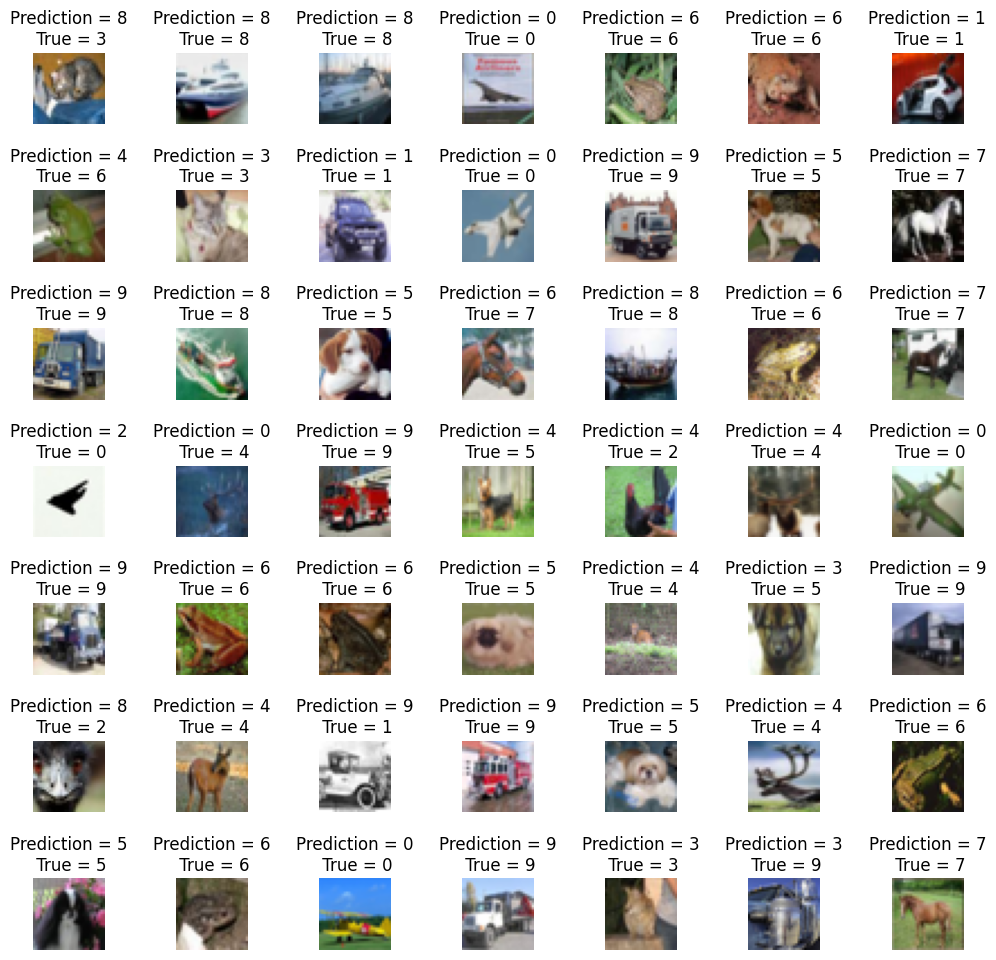

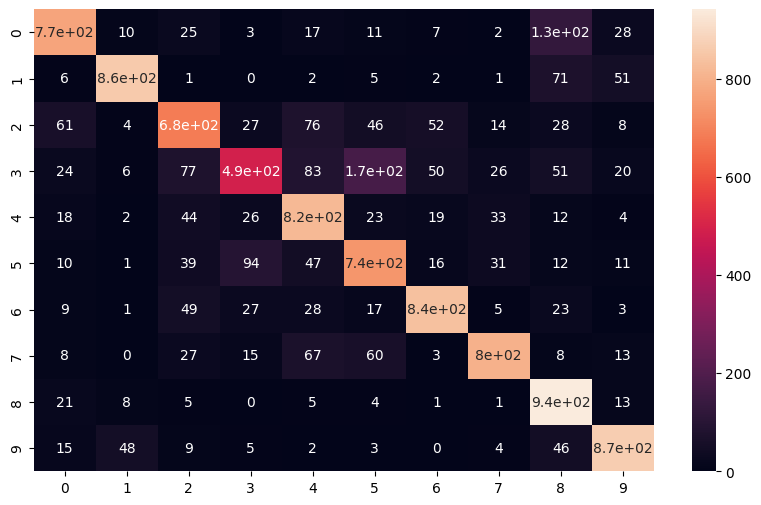

In [ ]:

# augmention
tr_datagen = ImageDataGenerator(
                             rotation_range = 15,
                             horizontal_flip = True,
                             width_shift_range = 0.1,
                             height_shift_range = 0.1
                             )
val_datagen = ImageDataGenerator()

tr_datagen.fit(X_train)
val_datagen.fit(X_val)

# retrain the model
# model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
#     filepath='.mdl_wts.hdf5',
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True)
callback = keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 5 ,restore_best_weights = True)


cnn_model_history_ag = cnn_model.fit(tr_datagen.flow(X_train,y_train, batch_size=64),
              epochs = 30,
              validation_data = val_datagen.flow(X_val, y_val, batch_size=64),
               shuffle = True, callbacks=[callback])
# evaluate the augmented model
evaluate_model(cnn_model_history_ag)
print('-'*20)

loss, accuracy = cnn_model.evaluate(X_test,y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")
print('-'*20)

# make predictions (categories) on the test data
y_pred_ag = cnn_model.predict(X_test)

# Get the class with the highest probability for each input sentence
predicted_classes_ag = y_pred.argmax(axis=1)
print(f'Predicted classes:\n\n {predicted_classes_ag}')

predicted_visualing_reporting(predicted_classes_ag)
saving_model('keras_cifar10_trained_Augmentation_model.h5', cnn_model)